In [17]:
pip install sdv

  Using cached copulas-0.6.1-py2.py3-none-any.whl (52 kB)
  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)Note: you may need to restart the kernel to use updated packages.



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\abhi\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from numpy import array, random, sum, unique
from pandas import DataFrame, read_csv

In [2]:
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn import metrics
import tensorflow as tf
from sklearn.manifold import TSNE

In [53]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.layers import Convolution1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adadelta

In [5]:
#LSTMs
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import LSTM, GRU, Bidirectional

In [4]:
#Setting up the dataset for ML
# Text file data converted to integer data type
import numpy as np
x_data = np.loadtxt("dataset/x_dataTrain.txt", dtype=float)
print(x_data)

[[3.27030e-24 3.07616e-24 5.22539e-24 ... 1.32958e-21 1.33228e-21
  1.35562e-21]
 [1.30267e-20 1.30677e-20 1.31157e-20 ... 3.81686e-20 3.81212e-20
  3.80739e-20]
 [6.26322e-21 6.28294e-21 6.30602e-21 ... 1.83835e-20 1.83606e-20
  1.83378e-20]
 ...
 [2.18046e-21 2.18672e-21 2.19415e-21 ... 4.09628e-21 4.09113e-21
  4.08599e-21]
 [8.45625e-21 8.48075e-21 8.50976e-21 ... 1.65705e-20 1.65496e-20
  1.65289e-20]
 [9.18122e-27 9.43401e-27 1.16085e-26 ... 4.02891e-22 4.05835e-22
  4.14389e-22]]


In [6]:
#Setting up the dataset for ML
# Text file data converted to integer data type
y_data = np.loadtxt("dataset/y_dataTrain.txt", dtype=float)
print(y_data)

[[5.44779525e-02 3.63563344e-01 3.93226327e-01 ... 3.84039400e-03
  1.04632279e-03 8.05759487e-06]
 [4.16023007e-02 1.98831946e-01 3.19697149e-01 ... 1.58676888e-04
  2.70865681e-04 6.98852685e-06]
 [3.25809662e-02 3.30184164e-01 2.25277622e-01 ... 3.64259914e-04
  1.77938880e-05 5.15590766e-06]
 ...
 [6.00137545e-03 2.25446819e-01 2.36290974e-01 ... 3.41272939e-03
  1.68012889e-04 8.55777941e-06]
 [9.61424398e-03 2.41019755e-01 4.74460251e-01 ... 2.28148605e-03
  1.53862644e-04 3.59720563e-06]
 [1.48247666e-02 4.65782909e-01 3.00848722e-01 ... 5.70894991e-03
  1.74632155e-04 1.76412088e-06]]


In [15]:
features = pd.DataFrame(x_data)

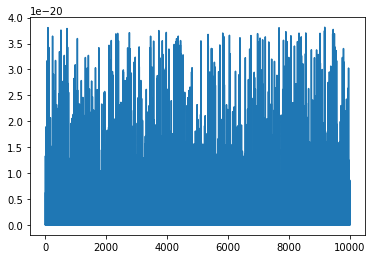

In [14]:
plt.plot(features['timestep'], features[6])

In [16]:
#Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [17]:
#Applying PCA for random forest regression
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_features)
#principalDf = pd.DataFrame(data = principalComponents)

In [9]:
PC_values = np.arange(10) + 1
PC_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

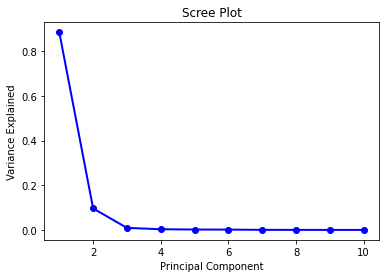

In [10]:
#Graphing scree plot
PC_values = np.arange(10) + 1
plt.plot(PC_values, pca.explained_variance_ratio_[:10], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(scaled_features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7'])

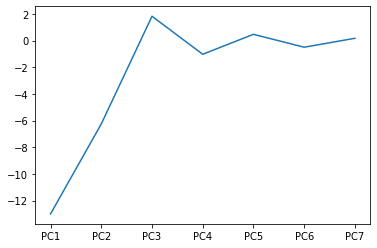

In [50]:
plt.plot(principalDf.iloc[78,:])
plt.show()

In [19]:
feature_dict = {
    0 : 'H2O',
    1 : 'CO2',
    2 : 'O2',
    3 : 'N2',
    4 : 'CH4',
    5 : 'N2O',
    6 : 'CO',
    7 : 'O3',
    8 : 'SO2',
    9 : 'NH3',
    10 : 'C2H6',
    11 : 'NO2'
}

In [20]:
labels = pd.DataFrame(y_data)
labels.rename(columns=feature_dict,
          inplace=True)
labelsSum = labels[['H2O','CO2', 'O2', 'N2', 'CH4']]

labelsSum['H2O'] = labelsSum['H2O'].apply(lambda x: x*100)
labelsSum['CO2'] = labelsSum['CO2'].apply(lambda x: x*100)
labelsSum['O2'] = labelsSum['O2'].apply(lambda x: x*100)
labelsSum['N2'] = labelsSum['N2'].apply(lambda x: x*100)
labelsSum['CH4'] = labelsSum['CH4'].apply(lambda x: x*100)

labelsSum

<ipython-input-20-cb945ec1c6d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelsSum['H2O'] = labelsSum['H2O'].apply(lambda x: x*100)
<ipython-input-20-cb945ec1c6d5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelsSum['CO2'] = labelsSum['CO2'].apply(lambda x: x*100)
<ipython-input-20-cb945ec1c6d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,H2O,CO2,O2,N2,CH4
0,5.447795,36.356334,39.322633,2.347669,12.807289
1,4.160230,19.883195,31.969715,37.276586,4.568130
2,3.258097,33.018416,22.527762,36.730550,2.988821
3,4.756591,22.928300,52.232608,0.433152,14.348949
4,8.355934,19.788123,39.827563,22.288283,6.370204
...,...,...,...,...,...
9998,3.211915,34.743236,35.990073,22.761101,1.522112
9999,1.049656,18.019818,33.185333,42.389717,3.421742
10000,0.600138,22.544682,23.629097,46.500135,5.045736
10001,0.961424,24.101976,47.446025,19.817285,4.904123


In [21]:
#principalDf['H2O'] = labelsSum['H2O']
principalDf['CO2'] = labelsSum['CO2']
#principalDf['O2'] = labelsSum['O2']
#principalDf['N2'] = labelsSum['N2']
#principalDf['CH4'] = labelsSum['CH4']

In [15]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,CO2
0,-25.424643,2.816010,-0.932619,-0.942056,0.745698,0.485008,-0.116221,36.356334
1,39.018136,-29.472460,7.854192,-0.731919,-1.544823,-2.029103,0.584580,19.883195
2,6.010855,-12.086132,3.994593,1.049289,0.840798,-1.299079,-0.334912,33.018416
3,30.156434,18.272219,-6.171593,3.593129,-6.599576,-0.526198,0.699163,22.928300
4,-23.095682,3.422651,-1.141312,-0.788522,0.414359,0.438226,-0.070641,19.788123
...,...,...,...,...,...,...,...,...
9998,-25.303770,3.240217,-0.555026,-0.276243,0.978344,0.225030,-0.285261,34.743236
9999,-8.128290,7.706736,-1.876401,1.225997,-0.965653,-0.001985,0.136725,18.019818
10000,-18.029311,-3.027248,0.804120,-1.089628,0.583664,-0.095435,0.067898,22.544682
10001,7.173905,-18.804619,5.598486,-1.138705,-0.311114,-1.824128,0.587837,24.101976


In [22]:
#Create synthetic data
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(principalDf)

C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\abhi\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4956: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
C:\Users\abhi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: Runt

In [100]:
sample = model.sample(num_rows=10003)
sample

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,CO2
0,-3.797451,-127.600841,-0.718956,-0.878745,0.493653,1.170634,-1.003342,42.493750
1,91.250170,2.646873,-1.510137,-0.451280,0.422461,0.788332,-0.154799,62.864013
2,36.027133,2.930200,-1.059164,-0.831028,0.320052,0.522106,-0.097722,24.711085
3,-25.719813,1.257280,-0.783212,-1.363925,44.143442,1.327446,-0.162462,17.883672
4,17.633589,9.012058,-1.295847,4.208676,-0.547997,0.633592,-0.351628,13.940662
...,...,...,...,...,...,...,...,...
9998,-15.492898,173.786799,-1.582737,-1.018890,0.620044,0.366805,-0.013224,4.900113
9999,-21.608719,-0.625647,-3.314894,-2.080781,0.517506,0.496151,10.561709,64.716900
10000,46.165926,4.184366,-1.280711,-0.815329,0.542138,0.418796,-0.128706,21.254911
10001,-12.945488,10.341241,-0.903215,-1.352822,16.253745,0.414608,-0.168432,6.429379


array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

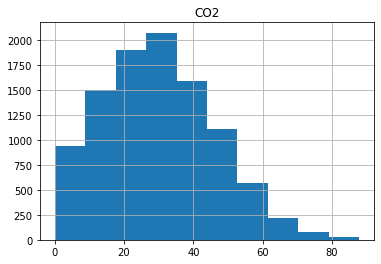

In [101]:
sample.hist(column='CO2')

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

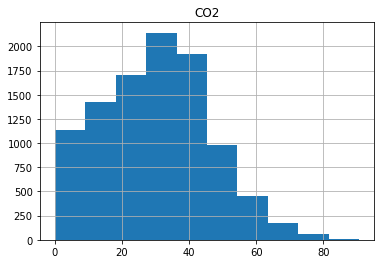

In [102]:
principalDf.hist(column='CO2')

In [66]:
from sdv.metrics.tabular import CSTest, KSTest
KSTest.compute(principalDf, sample)

0.861666500049985

In [74]:
from sdv.metrics.tabular import LogisticDetection, SVCDetection
print(LogisticDetection.compute(principalDf, sample))

0.6426807235745555


In [86]:
from sdv.metrics.tabular import MLPRegressor
MLPRegressor.compute(principalDf, sample, target='CO2')

C:\Users\abhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.014017071073312515

In [88]:
train = principalDf.sample(int(len(principalDf) * 0.75))
test = principalDf[~principalDf.index.isin(train.index)]
MLPRegressor.compute(train, test, target='CO2')

C:\Users\abhi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


-0.09599276240642096

In [23]:
synth_xData = model.sample(num_rows=100003)
synth_xData

C:\Users\abhi\anaconda3\lib\site-packages\sdv\tabular\base.py:250: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = previous_rows.append(sampled, ignore_index=True)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,CO2
0,-13.730129,2.533794,-1.203085,-0.783983,0.740345,0.479106,-0.151173,49.554674
1,-26.090306,4.882938,-6.250345,-0.875564,0.811322,0.480419,-0.135906,36.682591
2,-25.167723,-12.111915,9.186947,-6.925086,4.502365,1.687513,-5.055183,30.671628
3,-9.561024,5.696003,-1.210744,-0.815993,0.626104,0.442287,-0.095116,42.153404
4,-24.663766,5.779649,-1.447127,-0.829615,0.796890,0.630741,-0.129423,33.442361
...,...,...,...,...,...,...,...,...
99998,-26.386243,12.709517,-2.360930,-1.006473,6.430938,1.996447,-0.172620,19.319719
99999,6.255338,2.440244,-0.713355,-0.919962,4.993556,0.572317,-3.157575,7.643604
100000,-9.964499,26.026354,-0.911617,0.917230,-23.641809,0.303340,-0.145860,38.212574
100001,-26.287472,2.602387,-0.829957,-1.494193,3.184527,0.588340,-0.434070,41.089973


array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

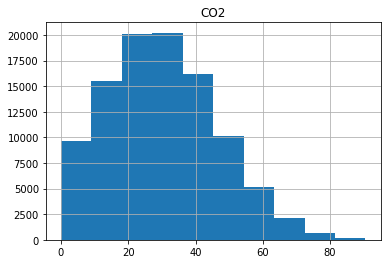

In [94]:
synth_xData.hist(column="CO2")

array([[<AxesSubplot:title={'center':'CO2'}>]], dtype=object)

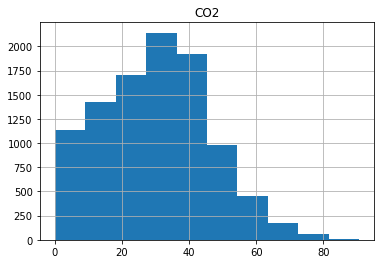

In [95]:
principalDf.hist(column="CO2")

In [25]:
X_features = synth_xData.iloc[:,:-1]
y_label =  synth_xData.iloc[:,-1:]
y_label = y_data[[1]]

In [161]:
y_label

,CO2
0,49.554674
1,36.682591
2,30.671628
3,42.153404
4,33.442361
...,...
99998,19.319719
99999,7.643604
100000,38.212574
100001,41.089973


In [26]:
synth_x_data = pca.inverse_transform(X_features)

In [27]:
fake_xData = pd.DataFrame(synth_x_data)
fake_xData

,0,1,2,3,4,5,6,7,8,9,...,4368,4369,4370,4371,4372,4373,4374,4375,4376,4377
0,-0.294278,-0.294175,-0.294712,-0.294241,-0.294067,-0.294430,-0.294021,-0.293793,-0.294038,-0.293933,...,-0.209778,-0.209724,-0.209714,-0.207774,-0.207487,-0.209459,-0.209507,-0.207349,-0.207380,-0.208733
1,-0.684416,-0.684215,-0.684287,-0.683928,-0.683695,-0.683694,-0.683357,-0.683101,-0.683050,-0.682844,...,-0.395689,-0.396393,-0.399679,-0.398123,-0.394124,-0.397776,-0.396994,-0.394368,-0.393526,-0.393841
2,0.272409,0.273073,0.266334,0.271246,0.272711,0.267991,0.272158,0.274255,0.270901,0.271561,...,-0.668255,-0.668035,-0.647053,-0.628350,-0.644303,-0.655525,-0.659533,-0.641515,-0.646841,-0.664701
3,-0.337912,-0.337808,-0.338126,-0.337779,-0.337628,-0.337831,-0.337523,-0.337336,-0.337461,-0.337355,...,-0.100308,-0.100192,-0.100796,-0.099291,-0.098641,-0.100194,-0.100133,-0.098526,-0.098439,-0.099326
4,-0.535487,-0.535383,-0.535974,-0.535470,-0.535289,-0.535691,-0.535254,-0.535013,-0.535287,-0.535180,...,-0.338280,-0.338112,-0.338428,-0.336849,-0.336435,-0.337959,-0.337939,-0.336277,-0.336230,-0.337253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99998,-0.856308,-0.855744,-0.858640,-0.856085,-0.855143,-0.857096,-0.854882,-0.853643,-0.854958,-0.854387,...,-0.453563,-0.450065,-0.435807,-0.429094,-0.442901,-0.442208,-0.446061,-0.441269,-0.444724,-0.452992
99999,-0.121835,-0.121127,-0.124098,-0.121277,-0.120170,-0.122137,-0.119684,-0.118261,-0.119548,-0.118839,...,-0.032610,-0.030860,-0.008825,-0.003476,-0.022775,-0.019197,-0.023681,-0.020772,-0.025968,-0.035021
100000,-0.922065,-0.923169,-0.912140,-0.920219,-0.922640,-0.914916,-0.921784,-0.925240,-0.919754,-0.920864,...,0.912098,0.900344,0.834138,0.812365,0.873603,0.866986,0.884002,0.868295,0.883341,0.915480
100001,-0.439623,-0.439392,-0.441417,-0.439890,-0.439413,-0.440824,-0.439520,-0.438851,-0.439845,-0.439612,...,-0.477448,-0.476301,-0.469679,-0.464894,-0.470604,-0.472520,-0.474201,-0.469829,-0.471378,-0.476387


In [316]:
scaler = StandardScaler()
test = scaler.fit_transform(fake_xData)

In [317]:
testFeatures = pd.DataFrame(test)

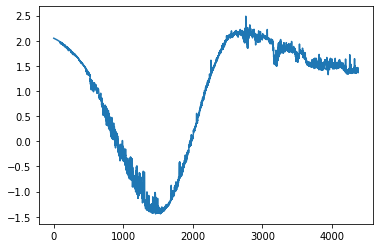

In [330]:
plt.plot(testFeatures.iloc[5,:])
plt.show()

In [319]:
test2 = scaler.fit_transform(features)

In [320]:
testFeatures2 = pd.DataFrame(test2)

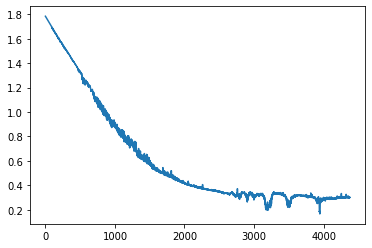

In [325]:
plt.plot(testFeatures2.iloc[1,:])
plt.show()

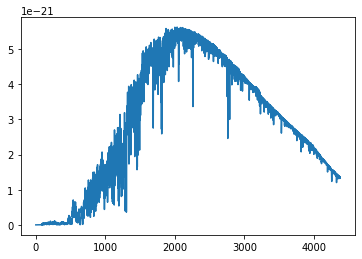

In [315]:
plt.plot(features.iloc[0,:])
plt.show()

In [270]:
y_label.iloc[9,0]

0.39910785908312746

In [225]:
y_label = labels.iloc[:,1:2]
y_label

,CO2
0,0.363563
1,0.198832
2,0.330184
3,0.229283
4,0.197881
...,...
9998,0.347432
9999,0.180198
10000,0.225447
10001,0.241020


In [226]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, y_label, test_size=0.30)

In [227]:
scaler = StandardScaler()
X_scaledTrain = scaler.fit_transform(X_train)
X_scaledTest = scaler.fit_transform(X_test)

In [228]:
y_scaler = StandardScaler()
y_scaledTrain = y_scaler.fit_transform(y_train)
y_scaledTest = y_scaler.fit_transform(y_test)

In [229]:
X_scaledTrain = np.squeeze(X_scaledTrain)
X_scaledTest = np.squeeze(X_scaledTest)

In [230]:
X_scaledTrain = np.expand_dims(X_scaledTrain,2)
X_scaledTest = np.expand_dims(X_scaledTest,2)

In [232]:
X_scaledTrain.shape

(7002, 4378, 1)

In [133]:
from tensorflow.keras import backend as K

In [233]:
def network():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='tanh', input_shape=(X_scaledTrain.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Lambda(lambda x: K.dropout(x,level=0.05)))
    model.add(Dense(y_scaledTrain.shape[-1], activation='relu'))

    return model

In [134]:
tau = 10000
lengthscale = .01
reg = lengthscale**2 * (1 - 0.05) / (2. * 100000 * tau)

In [136]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [102]:
def network():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='tanh', input_shape=(X_scaledTrain.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    
    model.add(Flatten())
    model.add(Dense(32, activation='relu', kernel_regularizer = regularizers.l2(reg)))
    model.add(Lambda(lambda x: K.dropout(x,level=0.05)))
    model.add(Dense(y_scaledTrain.shape[-1], activation='relu'))

    return model

In [179]:
#Creating Neural Network model
def network():
    exoAtmos = Sequential()

    exoAtmos.add(Dense(8, kernel_initializer='normal', activation='relu'))
    exoAtmos.add(BatchNormalization())
    exoAtmos.add(Dropout(0.05))
    
    exoAtmos.add(Dense(8, kernel_initializer='normal', activation='relu'))
    exoAtmos.add(BatchNormalization())
    exoAtmos.add(Dropout(0.05))


    # The Output Layer :
    exoAtmos.add(Dense(1))

    opt = tf.keras.optimizers.SGD(learning_rate=1)
    # Compile the network :
    exoAtmos.compile(loss='mae', optimizer=opt)
    
    return exoAtmos

In [234]:
cnn = network()
sgd = tensorflow.keras.optimizers.SGD(lr=0.1)
cnn.compile(loss='mean_squared_error')#,optimizer='sgd')

In [236]:
history = cnn.fit(X_scaledTrain, y_scaledTrain,
                          epochs=10,
                          verbose=1)

Epoch 1/10
219/219 [==============================] - 60s 273ms/step - loss: 1.0000
Epoch 2/10
219/219 [==============================] - 61s 278ms/step - loss: 1.0000
Epoch 3/10
219/219 [==============================] - 64s 290ms/step - loss: 1.0000
Epoch 4/10
219/219 [==============================] - 68s 312ms/step - loss: 1.0000
Epoch 5/10
 56/219 [======>.......................] - ETA: 54s - loss: 1.0087

KeyboardInterrupt: 

In [183]:
cnn.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 8)                 64        
_________________________________________________________________
batch_normalization_22 (Batc (None, 8)                 32        
_________________________________________________________________
dropout_27 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_53 (Dense)             (None, 8)                 72        
_________________________________________________________________
batch_normalization_23 (Batc (None, 8)                 32        
_________________________________________________________________
dropout_28 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)               

In [184]:
#Evaluating the model
mae = cnn.evaluate(X_scaledTest, y_scaledTest, verbose=0)
print('>%.3f' % mae)

>0.841


dict_keys(['loss'])


KeyError: 'val_loss'

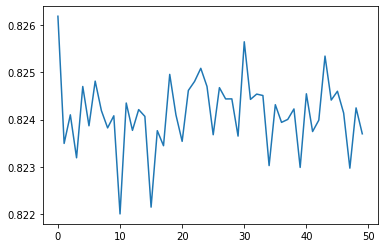

In [185]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [186]:
exoPredict = cnn.predict(X_scaledTrain)

In [187]:
exoPred_df = pd.DataFrame(exoPredict, columns = [0])
ypred_df = pd.DataFrame(y_scaledTest, columns = [0])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

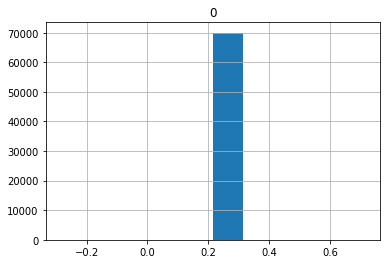

In [188]:
exoPred_df.hist(column=0)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

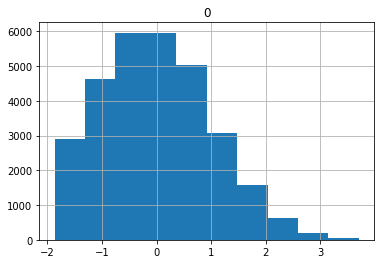

In [189]:
ypred_df.hist(column=0)